# Tarea - Pandas

Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para Enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:

    Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
    Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero
    Qué tipo de taxi recibe más propinas en promedio
    Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi
    Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero
    Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

Eres libre de utilizar la biblioteca que quieras para realizar las gráficas. Recuerda incluir notas en Markdown para darle una mejor calidad a tu informe estadístico.

P.D.: no te recomiendo que le pidas ayuda a un LLM para ayudarte, no sabe el contexto de tu dataset y por lo general tampoco sabe usar Polars, es mejor irte directo a la documentación o mandar mensaje al Telegram si tienes dudas UwU.

P.D. 2: Puedes usar la interfaz SQL de Polars para resolver sólo uno de los ejercicios (sino es trampa lmao), todo esta en la documentación w.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
yellow = pd.read_parquet('yellow_tripdata_2025-01.parquet')
green = pd.read_parquet('green_tripdata_2025-01.parquet')

In [3]:
fhv = pd.read_parquet('fhv_tripdata_2025-01.parquet')
fhvhv = pd.read_parquet('fhvhv_tripdata_2025-01.parquet')

In [4]:
display(yellow.head(3), green.head(3), fhv.head(3), fhvhv.head(3))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.6,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.5,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.6,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.8,0.0,NaN,1.0,34.00,1.0,1.0,0.0,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.0,0.0,NaN,1.0,11.10,2.0,1.0,0.0,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.0,0.0,NaN,1.0,26.55,2.0,2.0,0.0,0.0


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2025-01-01 00:20:00,2025-01-01 00:57:00,NaN,NaN,NaN,B00009
1,B00013,2025-01-01 00:40:00,2025-01-01 02:21:00,NaN,NaN,NaN,B00888
2,B00112,2025-01-01 00:22:59,2025-01-01 00:45:28,NaN,108.0,NaN,B00112


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,2.75,0.0,0.0,15.71,N,N,N,N,N,0.0
1,HV0005,B03406,None,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,0.00,0.0,0.0,23.57,N,N,N,N,N,0.0
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,0.00,2.5,0.0,47.75,N,N,N,N,N,0.0


In [5]:
# Mostramos el tipo de dato de cada columna
print("Tipos de datos de las columnas de Yellow:")
print(yellow.dtypes)
print("\nTipos de datos de las columnas de Green:")
print(green.dtypes)
print("\nTipos de datos de las columnas de FHV:")
print(fhv.dtypes)
print("\nTipos de datos de las columnas de FHVHV:")
print(fhvhv.dtypes)

Tipos de datos de las columnas de Yellow:
VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
cbd_congestion_fee              float64
dtype: object

Tipos de datos de las columnas de Green:
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime 

# 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

## Análisis del caso
Para el archivo de yellow y green, encontramos la columna llamada:
- total_amount
- Para el caso de FHVHV, está la columna:
- base_passenger_fare

En el caso de FHV, no encontramos ninguna columna que pueda estar asociada a los ingresos brutos.

In [6]:
# Obtenemos el promedio de ingreso bruto por taxi
yellow_promedio = yellow['total_amount'].mean()
green_promedio = green['total_amount'].mean()
fhvhv_promedio = fhvhv['base_passenger_fare'].mean()

print(f"\nIngreso bruto promedio por taxi Yellow: ${yellow_promedio:.2f}")
print(f"Ingreso bruto promedio por taxi Green: ${green_promedio:.2f}")
print(f"Ingreso bruto promedio por taxi FHVHV: ${fhvhv_promedio:.2f}")

# Obtenemos el promedio de ingreso bruto de los taxis
promedio_total = (yellow_promedio + green_promedio + fhvhv_promedio) / 3
print(f"\nIngreso bruto promedio de los tres taxis: ${promedio_total:.2f}")


Ingreso bruto promedio por taxi Yellow: $25.61
Ingreso bruto promedio por taxi Green: $22.63
Ingreso bruto promedio por taxi FHVHV: $24.27

Ingreso bruto promedio de los tres taxis: $24.17


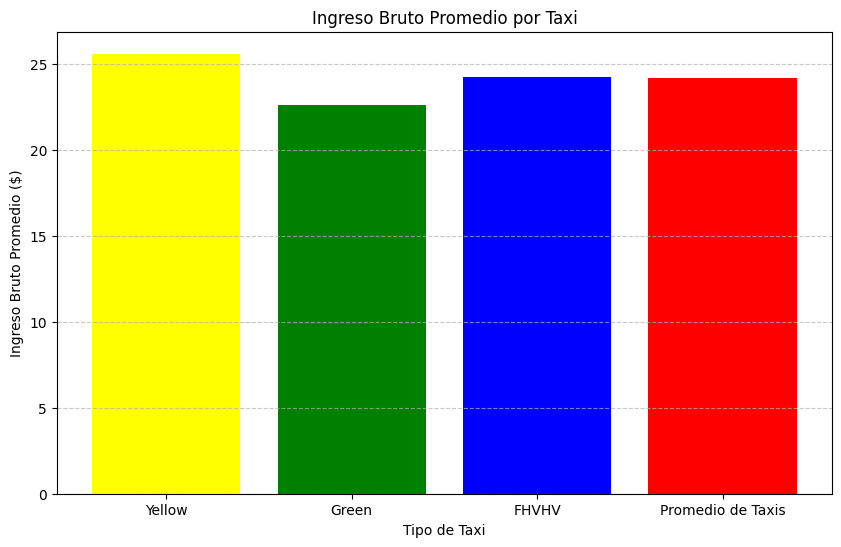

In [7]:
# Creamos un gráfico de barras para visualizar el ingreso bruto promedio por taxi
plt.figure(figsize=(10, 6))
plt.bar(['Yellow', 'Green', 'FHVHV', 'Promedio de Taxis'], 
        [yellow_promedio, green_promedio, fhvhv_promedio, promedio_total], 
        color=['yellow', 'green', 'blue', 'red'])
plt.title('Ingreso Bruto Promedio por Taxi')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Ingreso Bruto Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. ¿Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero?


Columnas Importantes:
- trip_distance (Yellow, Green)
- trip_miles (FHVHV)

FHV no tiene una columna de distancia, por lo que no se incluiría en este análisis.

Supondremos que los datos de trip_distance se miden también en millas.

In [8]:
# Distancia total promedio recorrida por cada tipo de taxi
yellow_distancia = yellow['trip_distance'].mean()
green_distancia = green['trip_distance'].mean()
fhvhv_distancia = fhvhv['trip_miles'].mean()

print(f"\nDistancia total recorrida por taxis Yellow: {yellow_distancia:.2f} millas")
print(f"Distancia total recorrida por taxis Green: {green_distancia:.2f} millas")
print(f"Distancia total recorrida por taxis FHVHV: {fhvhv_distancia:.2f} millas")


Distancia total recorrida por taxis Yellow: 5.86 millas
Distancia total recorrida por taxis Green: 21.53 millas
Distancia total recorrida por taxis FHVHV: 4.85 millas


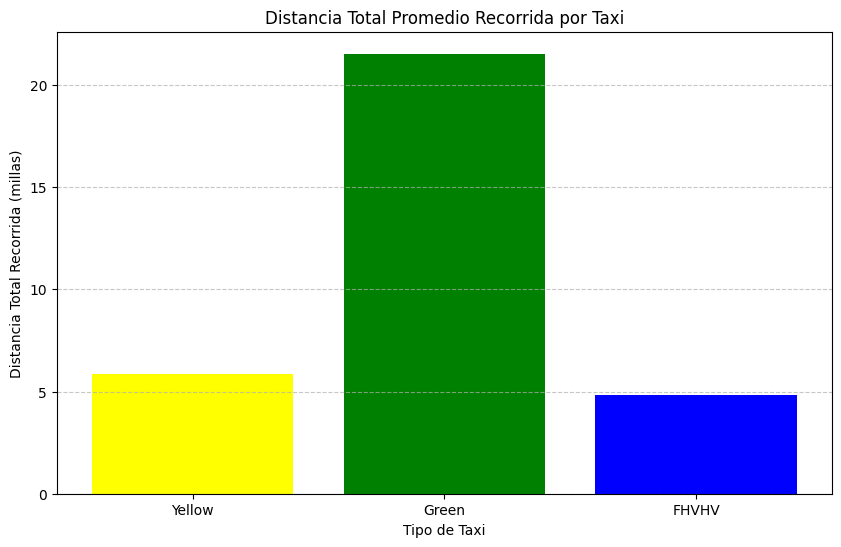

In [9]:
# Creamos un gráfico de barras para visualizar la distancia total recorrida por taxi
plt.figure(figsize=(10, 6))
plt.bar(['Yellow', 'Green', 'FHVHV'], 
        [yellow_distancia, green_distancia, fhvhv_distancia], 
        color=['yellow', 'green', 'blue'])
plt.title('Distancia Total Promedio Recorrida por Taxi')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Distancia Total Recorrida (millas)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. ¿Qué tipo de taxi recibe más propinas en promedio?


Columnas relevantes:
- tip_amount (Yellow, Green)
- tips (FHVHV)

FHV no tiene una columna de propinas, así que se omite en este análisis.


In [10]:
# Promedio de propinas por taxi
yellow_propina = yellow['tip_amount'].mean()
green_propina = green['tip_amount'].mean()
fhvhv_propina = fhvhv['tips'].mean()

print(f"\nPropina promedio por taxi Yellow: ${yellow_propina:.2f}")
print(f"Propina promedio por taxi Green: ${green_propina:.2f}")
print(f"Propina promedio por taxi FHVHV: ${fhvhv_propina:.2f}")


Propina promedio por taxi Yellow: $2.96
Propina promedio por taxi Green: $2.48
Propina promedio por taxi FHVHV: $1.04


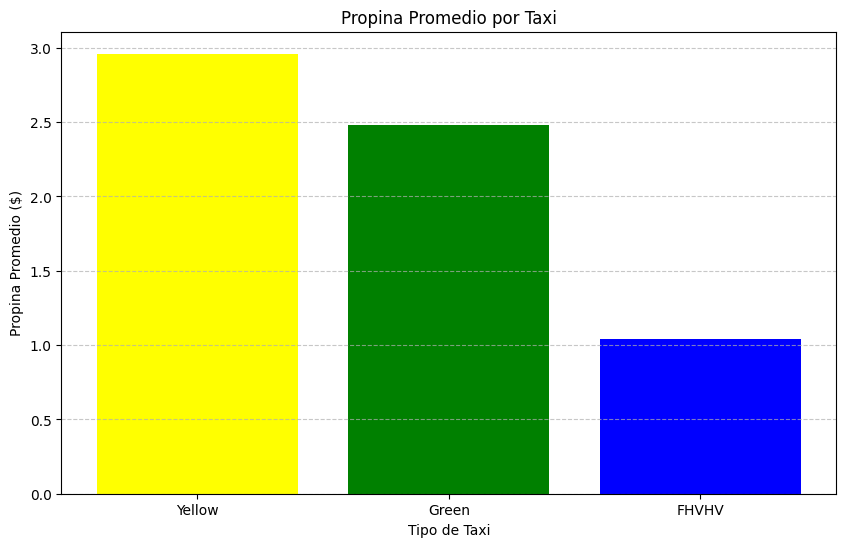

In [11]:
# Creamos un gráfico de barras para visualizar la propina promedio por taxi
plt.figure(figsize=(10, 6))
plt.bar(['Yellow', 'Green', 'FHVHV'], 
        [yellow_propina, green_propina, fhvhv_propina], 
        color=['yellow', 'green', 'blue'])
plt.title('Propina Promedio por Taxi')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Propina Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi


Columnas clave:
- tolls_amount (Yellow, Green)
- tolls (FHVHV)

FHV no tiene una columna de peajes.



Importe total de peaje por taxis Yellow: $0.45
Importe total de peaje por taxis Green: $0.18
Importe total de peaje por taxis FHVHV: $1.03


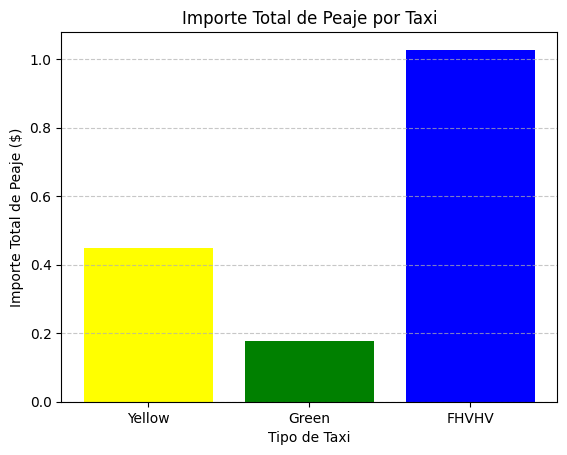

In [12]:
# Cálculo del importe del peaje total de cada tipo de taxi
yellow_peaje = yellow['tolls_amount'].mean()
green_peaje = green['tolls_amount'].mean()
fhvhv_peaje = fhvhv['tolls'].mean()

print(f"\nImporte total de peaje por taxis Yellow: ${yellow_peaje:.2f}")
print(f"Importe total de peaje por taxis Green: ${green_peaje:.2f}")
print(f"Importe total de peaje por taxis FHVHV: ${fhvhv_peaje:.2f}")

# Creamos un gráfico de barras para visualizar el importe total de peaje por taxi
plt.bar(['Yellow', 'Green', 'FHVHV'], 
        [yellow_peaje, green_peaje, fhvhv_peaje], 
        color=['yellow', 'green', 'blue'])
plt.title('Importe Total de Peaje por Taxi')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Importe Total de Peaje ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Mapa de calor: Horas en las que se tomaron los taxis durante Enero


Columnas clave:
- tpep_pickup_datetime (Yellow)
- lpep_pickup_datetime (Green)
- pickup_datetime (FHV, FHVHV)


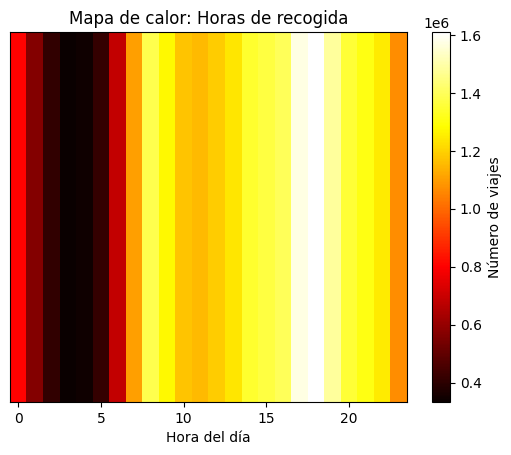

In [13]:
# Mapa de calor de las horas en las que se tomaron los taxis

# Combinamos todos los datos de las diferentes categorías de taxis en un solo DataFrame
# y renombramos la columna de fecha y hora para que sea consistente
taxis_horas = pd.concat([
    yellow[['tpep_pickup_datetime']].rename(columns={'tpep_pickup_datetime': 'pickup_datetime'}),
    green[['lpep_pickup_datetime']].rename(columns={'lpep_pickup_datetime': 'pickup_datetime'}),
    fhv[['pickup_datetime']],
    fhvhv[['pickup_datetime']]
])

# Convertimos la columna de fecha y hora a tipo datetime
taxis_horas['hora'] = taxis_horas['pickup_datetime'].dt.hour
# Agrupamos por hora y contamos el número de viajes
viajes_por_hora = taxis_horas.groupby('hora').size()

# Graficar mapa de calor
plt.imshow(viajes_por_hora.values.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: Horas de recogida')
plt.xlabel('Hora del día')
plt.yticks([])
plt.show()

# 6. Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio


Columnas clave:
- tpep_pickup_datetime (Yellow)
- lpep_pickup_datetime (Green)
- pickup_datetime (FHV, FHVHV)


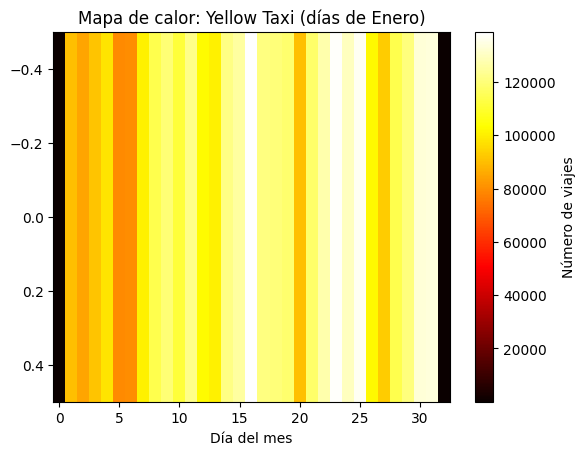

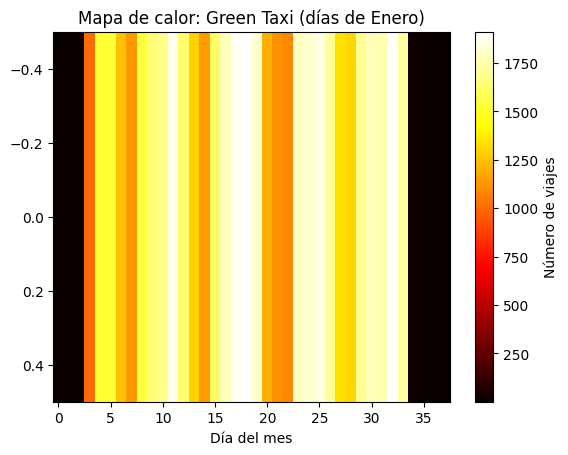

In [14]:
# Mapa de calor por días para cada tipo de taxi
# Yellow Taxi
yellow['dia'] = yellow['tpep_pickup_datetime'].dt.date
yellow_diarios= yellow.groupby('dia').size()

plt.imshow(yellow_diarios.values.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: Yellow Taxi (días de Enero)')
plt.xlabel('Día del mes')
plt.show()

# Green Taxi
green['dia'] = green['lpep_pickup_datetime'].dt.date
green_diarios= green.groupby('dia').size()

plt.imshow(green_diarios.values.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: Green Taxi (días de Enero)')
plt.xlabel('Día del mes')
plt.show()


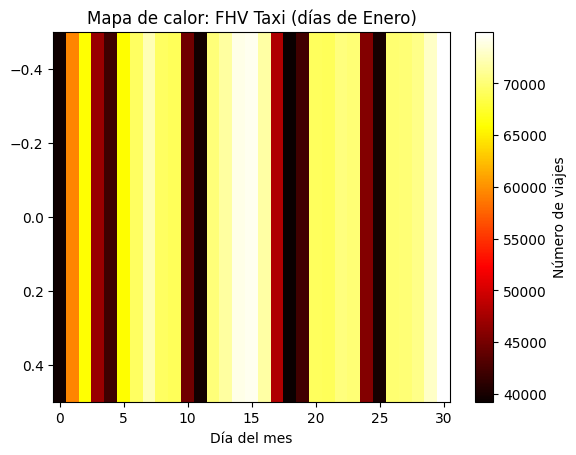

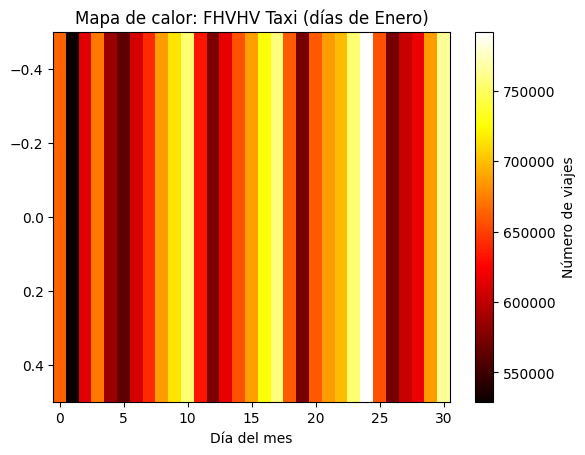

In [15]:
# FHV Taxi
fhv['dia'] = fhv['pickup_datetime'].dt.date
fhv_diarios = fhv.groupby('dia').size()
plt.imshow(fhv_diarios.values.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: FHV Taxi (días de Enero)')
plt.xlabel('Día del mes')
plt.show()
# FHVHV Taxi
fhvhv['dia'] = fhvhv['pickup_datetime'].dt.date
fhvhv_diarios = fhvhv.groupby('dia').size()
plt.imshow(fhvhv_diarios.values.reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: FHVHV Taxi (días de Enero)')
plt.xlabel('Día del mes')
plt.show()